In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os
import math
import copy
from collections import OrderedDict

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import pymaster as nmt
import pyccl as ccl
from tqdm.notebook import tqdm

sys.path.append('..')
from utils import get_config
from experiment import Experiment, show_mcmc_report, run_experiments
from plotting import my_mollview, plot_correlation_matrix, plot_correlation, plot_many_data_correlations

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='ticks')
pd.set_option('mode.chained_assignment', None)

# Run experiment

In [4]:
config = get_config('LoTSS_DR2')
display(config)

{'lss_survey_name': 'LoTSS_DR2',
 'lss_mask_name': 'Mask_noise_99percent',
 'flux_min_cut': 2,
 'nside': 512,
 'z_tail': 1.0,
 'bias': 1.3,
 'scale_bias': True,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'correlation_symbols': ['gg', 'gk'],
 'l_max': {'gg': 510, 'gk': 510},
 'ells_per_bin': {'gg': 50, 'gk': 50},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [5]:
experiment = Experiment(config, set_maps=True)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 2mJy: (1062278, 24)


/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

Flux probability integral error: 0.0258
d flux: 1.9051 (mJy)


  0%|          | 0/786432 [00:00<?, ?it/s]

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".form

In [6]:
experiment.set_correlations()

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

covariance matrices:   0%|          | 0/3 [00:00<?, ?it/s]

# CMB temperature correlations

In [7]:
# coverage
experiment.print_correlation_statistics()

C_gg sigma: 30.06
C_gg chi squared: 4203.42
C_gt sigma: 2.04
C_gt chi squared: 2.62


In [7]:
# 75 percent
experiment.print_correlation_statistics()

C_gg sigma: 15.54
C_gg chi squared: 290.78
C_gt sigma: 1.22
C_gt chi squared: 0.01


In [7]:
# coverage, 1 mJy, 3x
experiment.print_correlation_statistics()

C_gg sigma: 63.09
C_gg chi squared: 57888.02
C_gt sigma: 3.62
C_gt chi squared: 20.13


In [7]:
# coverage, 0.5 mJy, 3x16
experiment.print_correlation_statistics()

C_gg sigma: 136.92
C_gg chi squared: 2766051.58
C_gt sigma: 6.57
C_gt chi squared: 203.59


In [7]:
# coverage, 1 mJy
experiment.print_correlation_statistics()

C_gg sigma: 53.08
C_gg chi squared: 54746.53
C_gt sigma: 3.78
C_gt chi squared: 18.42


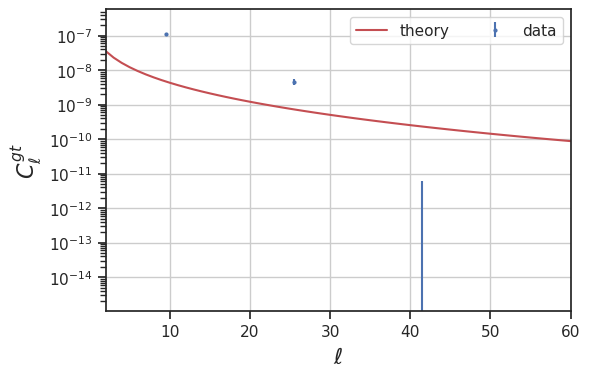

In [9]:
# coverage, 0.5 mJy, 3x16
plot_correlation(experiment, 'gt', x_min=2, x_max=60, y_min=None, y_max=None, x_scale='linear', y_scale='log')

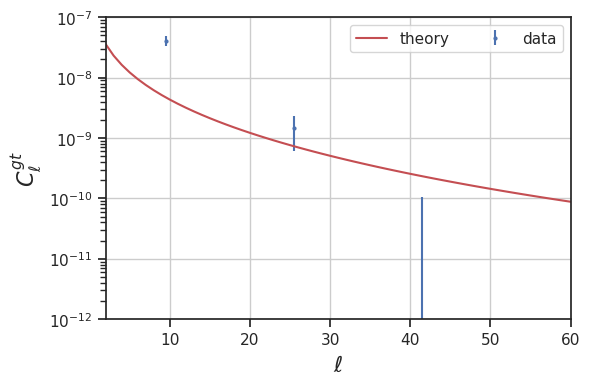

In [9]:
# coverage, 1 mJy, 3x16
plot_correlation(experiment, 'gt', x_min=2, x_max=60, y_min=1e-12, y_max=1e-7, x_scale='linear', y_scale='log')

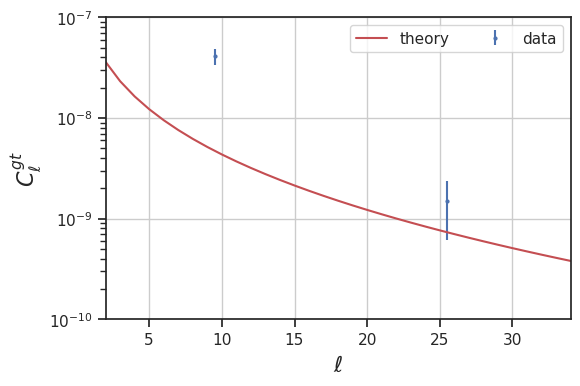

In [10]:
# coverage, 1 mJy
plot_correlation(experiment, 'gt', x_min=2, x_max=34, y_min=1e-10, y_max=1e-7, x_scale='linear', y_scale='log')

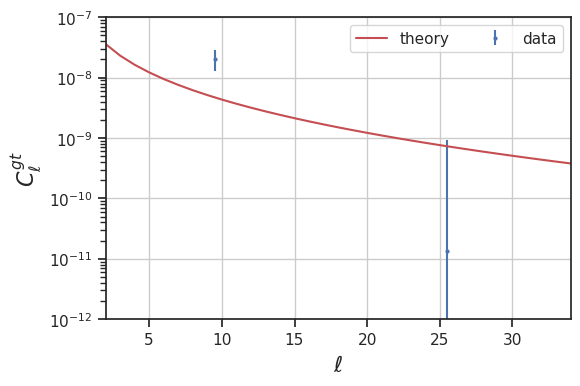

In [8]:
# coverage
plot_correlation(experiment, 'gt', x_min=2, x_max=34, y_min=1e-12, y_max=1e-7, x_scale='linear', y_scale='log')

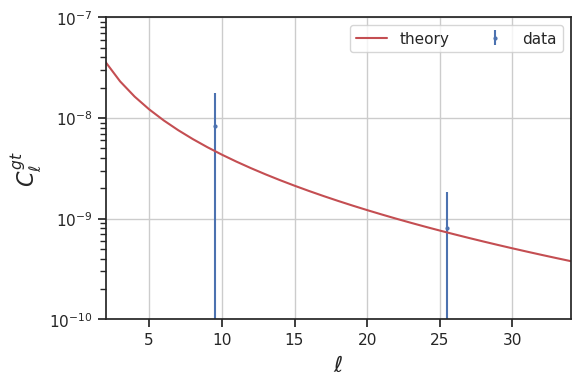

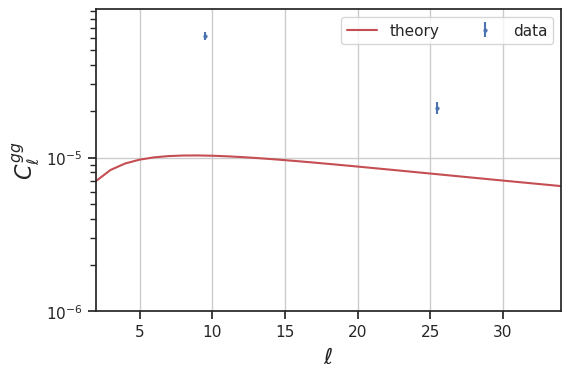

In [8]:
# 75 percent
plot_correlation(experiment, 'gt', x_min=2, x_max=34, y_min=1e-10, y_max=1e-7, x_scale='linear', y_scale='log')

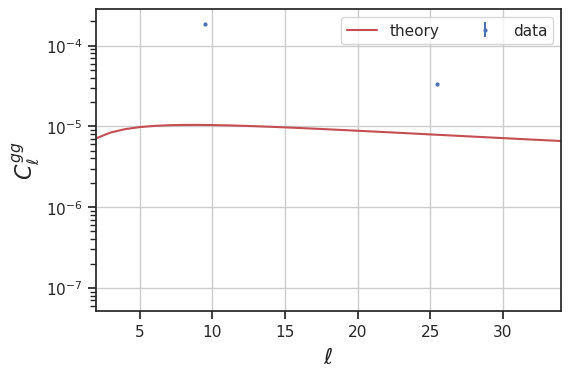

In [9]:
# coverage
plot_correlation(experiment, 'gg', x_min=2, x_max=34, y_min=None, y_max=None, x_scale='linear', y_scale='log')

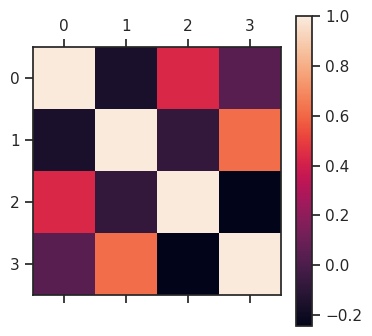

In [10]:
plot_correlation_matrix(experiment)

# CMB lensing correlations

In [7]:
# coverage, 0.5 mJy
experiment.print_correlation_statistics()

C_gg sigma: 243.08
C_gg chi squared: 2355793.45
C_gk sigma: 17.05
C_gk chi squared: 112.42


In [7]:
# coverage, 1 mJy
experiment.print_correlation_statistics()

C_gg sigma: 180.14
C_gg chi squared: 60448.63
C_gk sigma: 20.42
C_gk chi squared: 46.95


In [7]:
# 99 percent
experiment.print_correlation_statistics()

C_gg sigma: 154.04
C_gg chi squared: 1374.37
C_gk sigma: 19.80
C_gk chi squared: 19.61


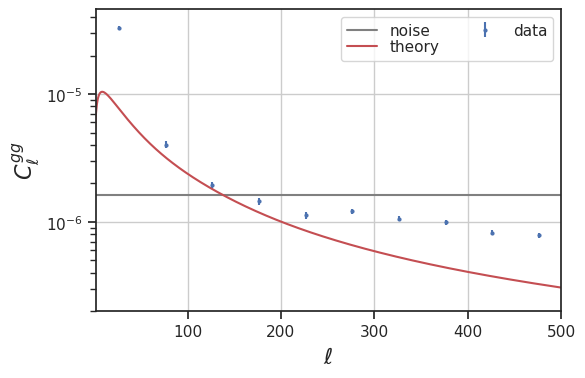

In [7]:
# 2mJy, 99 percent, noise weight correction
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=0.2e-6, y_max=None, x_scale='linear', y_scale='log')

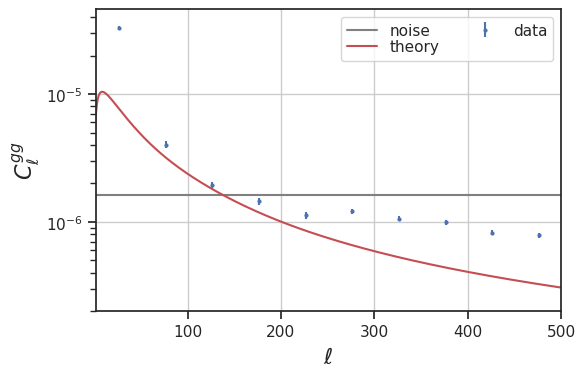

In [16]:
# 2mJy, 99 percent
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=0.2e-6, y_max=None, x_scale='linear', y_scale='log')

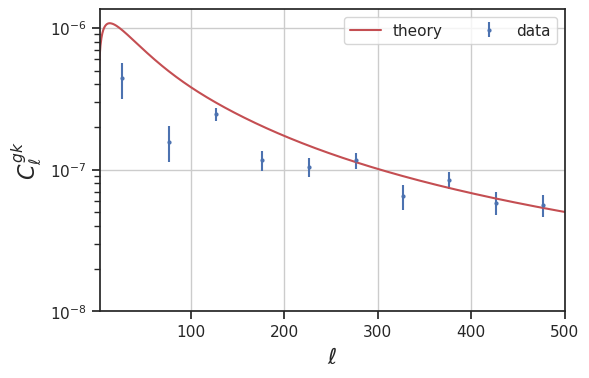

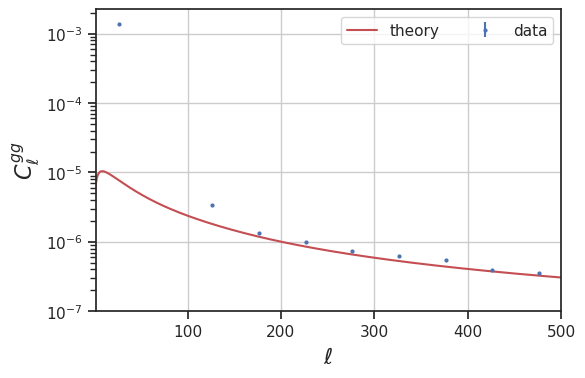

In [8]:
# coverage, 0.5 mJy
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

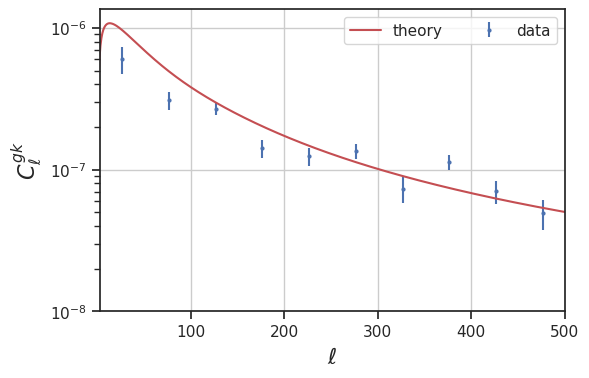

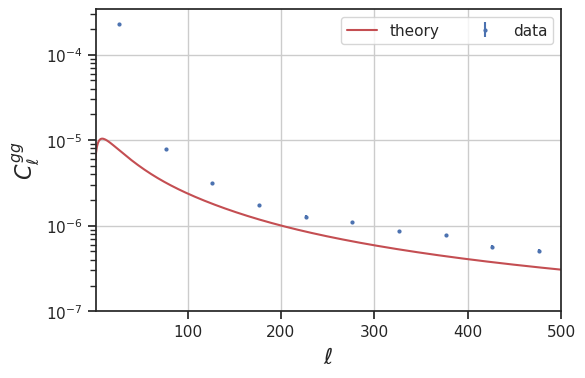

In [8]:
# coverage, 1 mJy
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

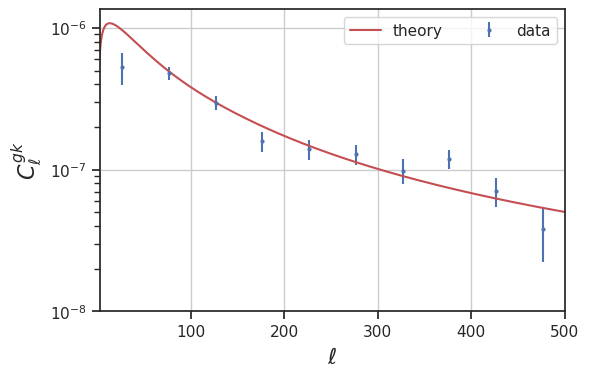

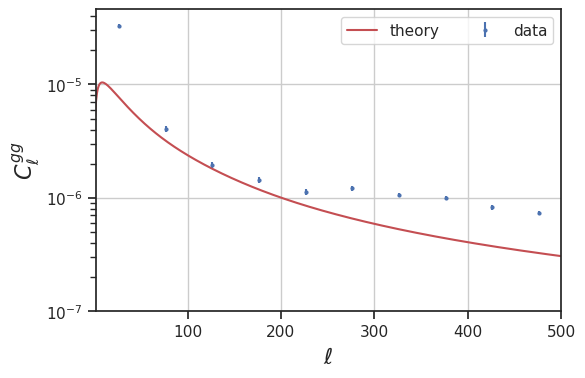

In [8]:
# 99 percent
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

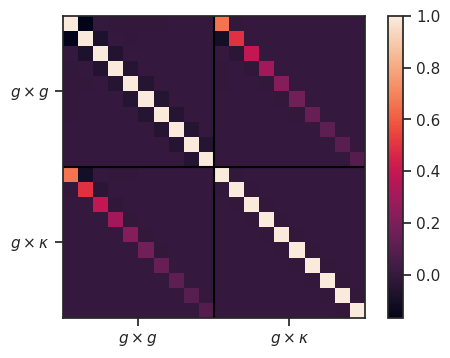

In [22]:
plot_correlation_matrix(experiment)

In [25]:
experiment.noise_decoupled

defaultdict(int,
            {'gg': array([4.65486147e-07, 4.62123341e-07, 4.62243480e-07, 4.62245560e-07,
                    4.62254483e-07, 4.62265126e-07, 4.62288940e-07, 4.62352938e-07,
                    4.62040650e-07, 4.76472157e-07])})

# Binning experiments

In [5]:
display(config)

{'lss_survey_name': 'LoTSS_DR2',
 'lss_mask_name': 'Mask_noise_75percent',
 'flux_min_cut': 2,
 'nside': 512,
 'z_tail': 1.0,
 'bias': 1.3,
 'scale_bias': True,
 'cosmology_name': 'planck',
 'cosmology_matter_power_spectrum': 'halofit',
 'correlation_symbols': ['gg', 'gk'],
 'l_max': {'gg': 510, 'gk': 510},
 'ells_per_bin': {'gg': 50, 'gk': 50},
 'starting_params': {'bias': [2.1, 0.5], 'sigma8': [0.83, 0.1]},
 'n_walkers': 32,
 'max_iterations': 5000,
 'continue_sampling': False}

In [7]:
ells_per_bin_arr = [2, 4, 8, 16, 32, 50, 64, 128]
params_to_update = {'ells_per_bin': [{'gg': ells_per_bin, 'gk': ells_per_bin} for ells_per_bin in ells_per_bin_arr]}

experiments = run_experiments(config, params_to_update, pre_data=True, pre_maps=True)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 2mJy: (1062278, 24)


/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

  0%|          | 0/8 [00:00<?, ?it/s]

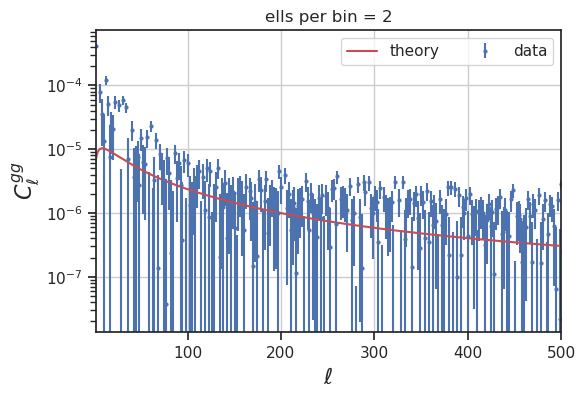

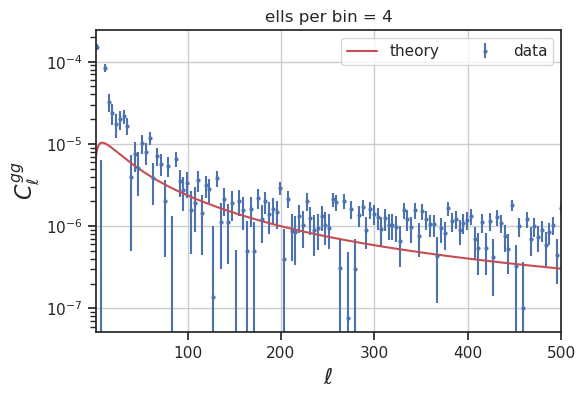

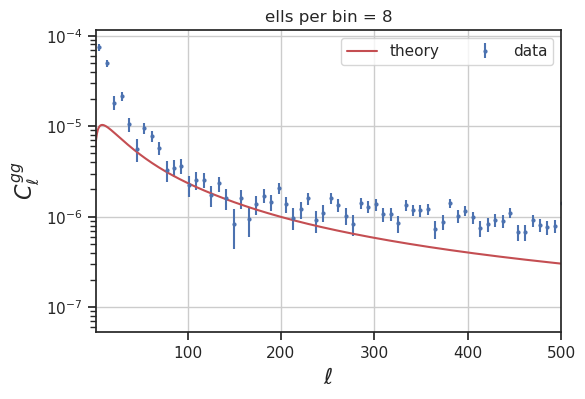

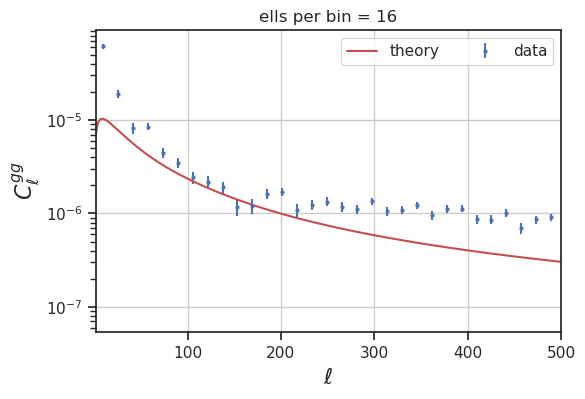

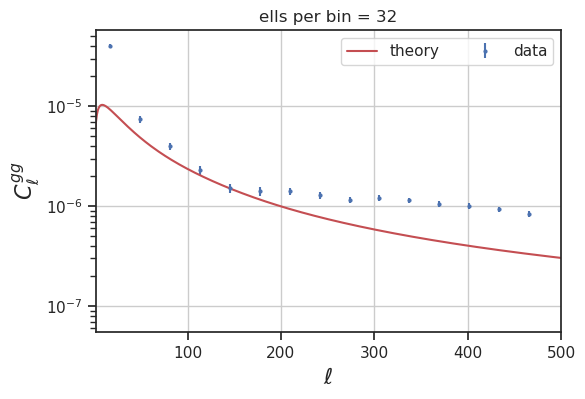

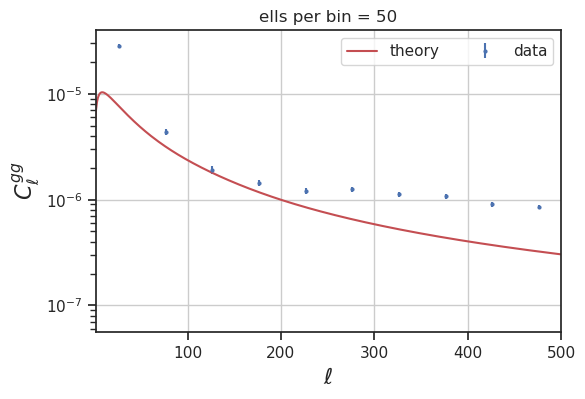

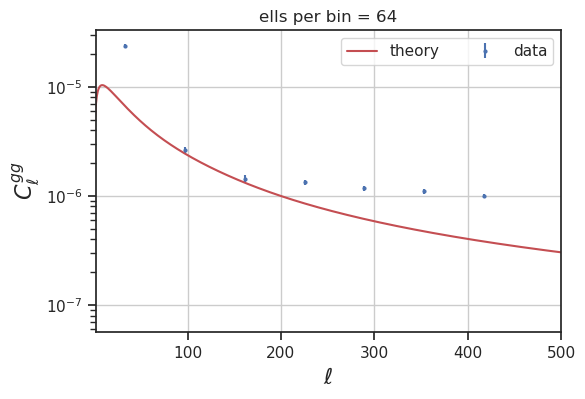

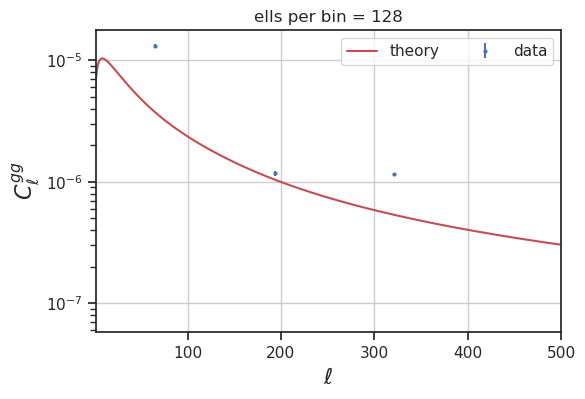

In [8]:
for ells_per_bin, experiment in experiments.items():
    title = 'ells per bin = {}'.format(ells_per_bin)
    plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log', with_error=True, title=title)

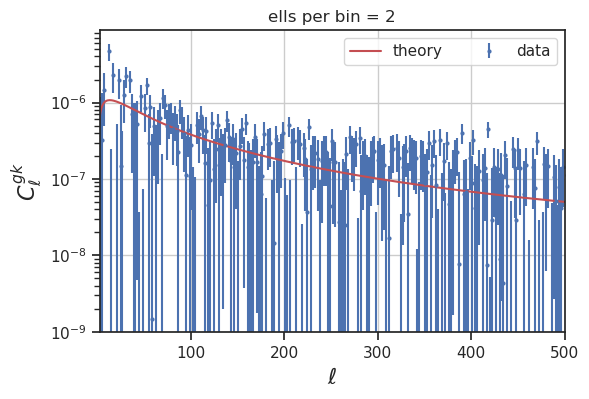

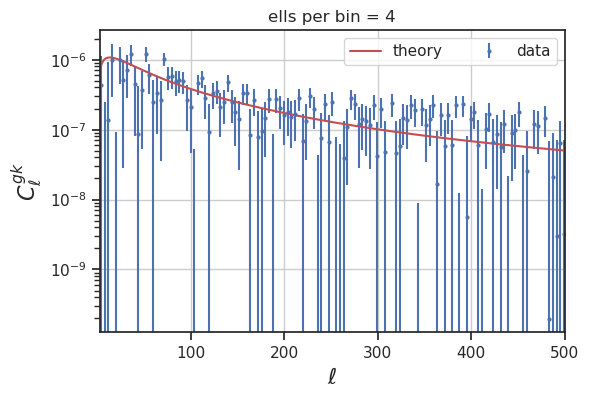

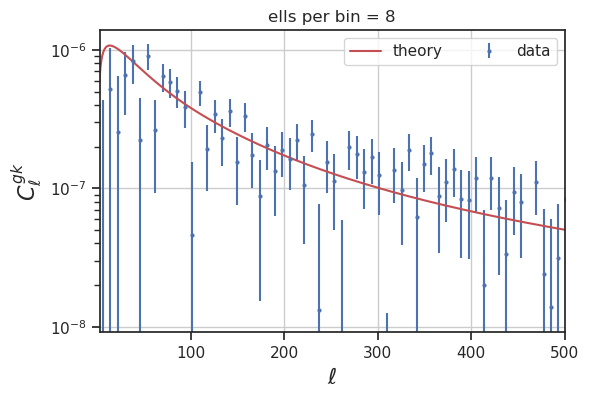

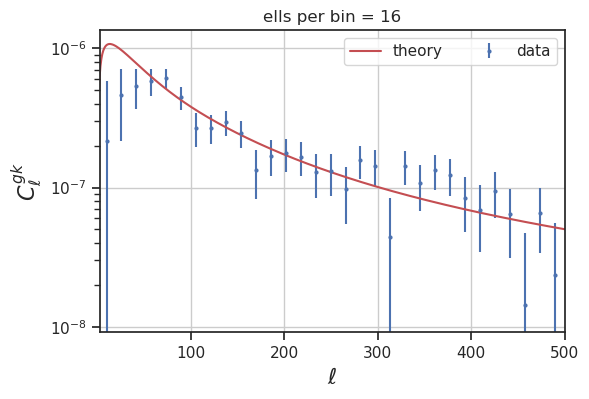

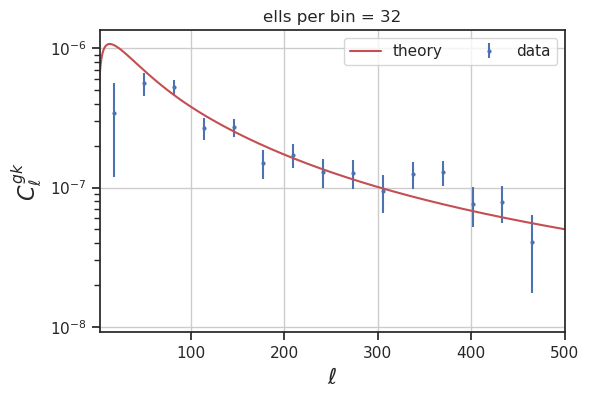

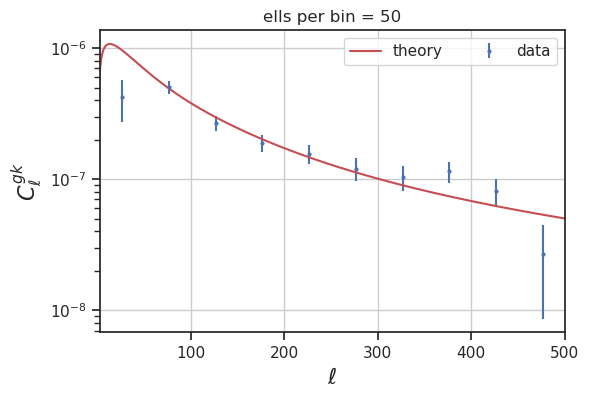

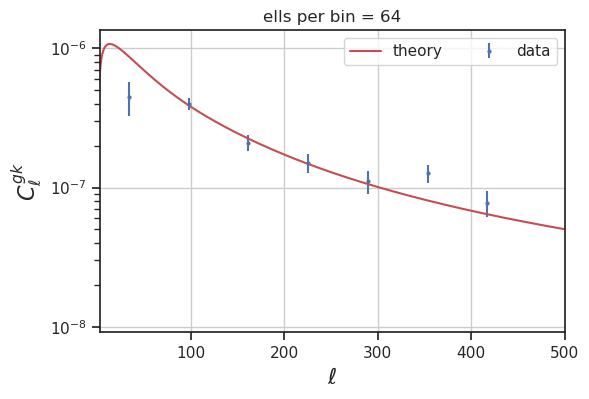

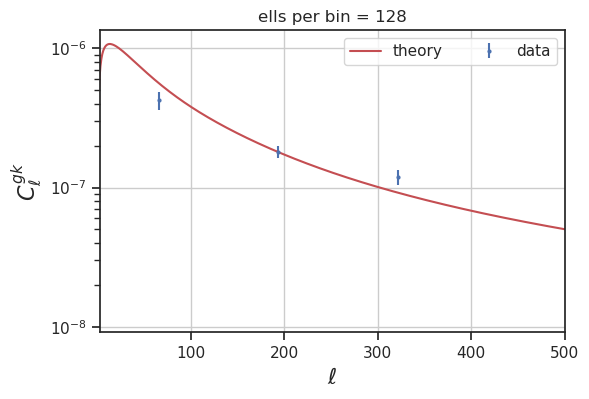

In [9]:
for ells_per_bin, experiment in experiments.items():
    title = 'ells per bin = {}'.format(ells_per_bin)
    plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='log', with_error=True, title=title)

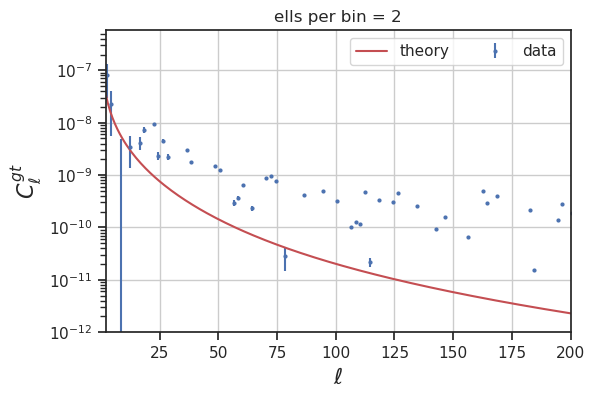

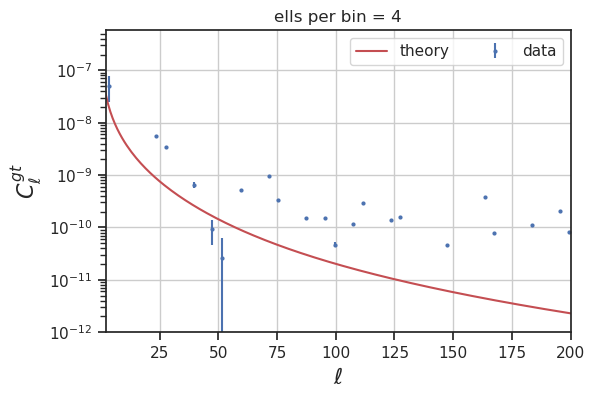

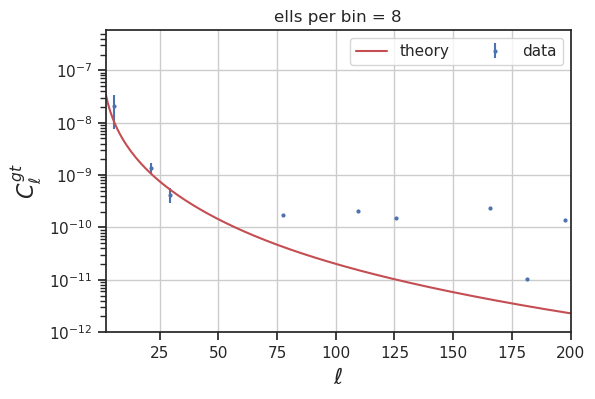

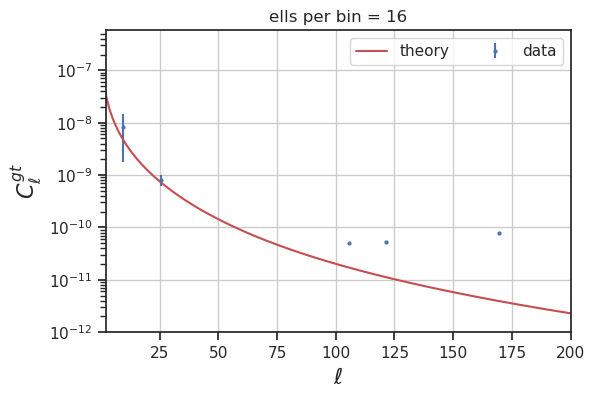

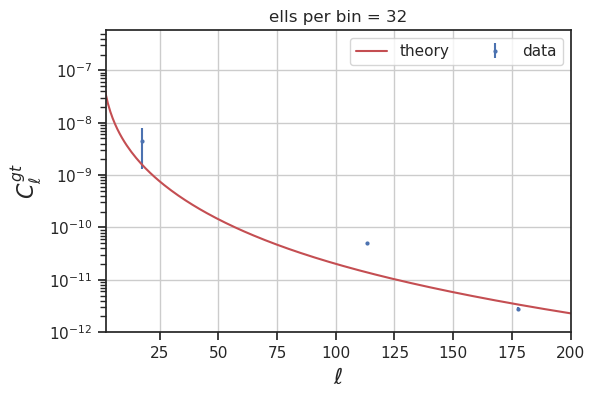

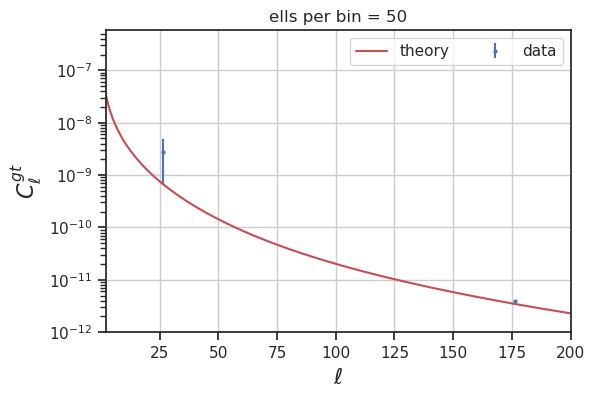

In [7]:
for ells_per_bin, experiment in experiments.items():
    title = 'ells per bin = {}'.format(ells_per_bin)
    plot_correlation(experiment, 'gt', x_min=2, x_max=200, y_min=1e-12, y_max=None, x_scale='linear', y_scale='log', with_error=True, title=title)

## Mask experiments

In [ ]:
params_to_update = {
    'lss_mask_name': ['Mask_coverage', 'Mask_default', 'Mask_noise_99percent', 'Mask_noise_75percent', 'Mask_noise_median'],
}
experiments = run_experiments(config, params_to_update, pre_data=True, pre_maps=False)

Original LoTSS DR2 datashape: (4395448, 24)
Total flux of S > 0.5mJy: (3752487, 24)


  0%|          | 0/5 [00:00<?, ?it/s]

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

covariance matrices:   0%|          | 0/3 [00:00<?, ?it/s]

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

covariance matrices:   0%|          | 0/3 [00:00<?, ?it/s]

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

covariance matrices:   0%|          | 0/3 [00:00<?, ?it/s]

data correlations:   0%|          | 0/2 [00:00<?, ?it/s]

covariance matrices:   0%|          | 0/3 [00:00<?, ?it/s]

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  **kwds
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


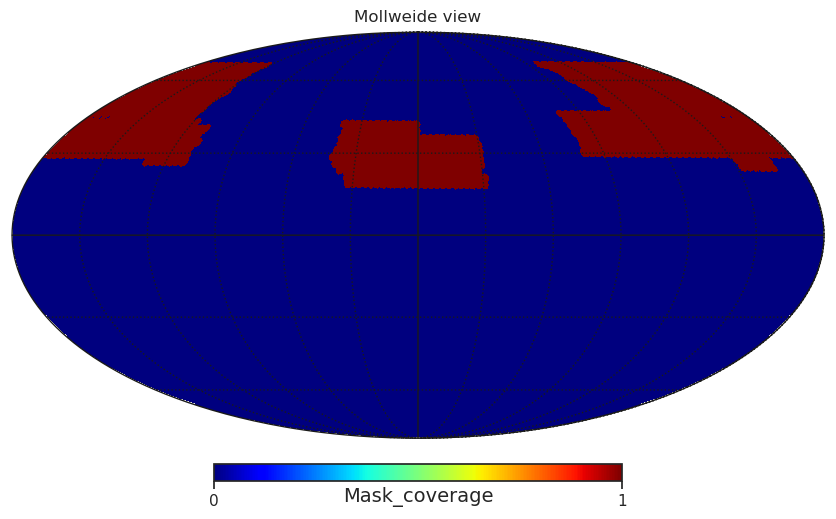

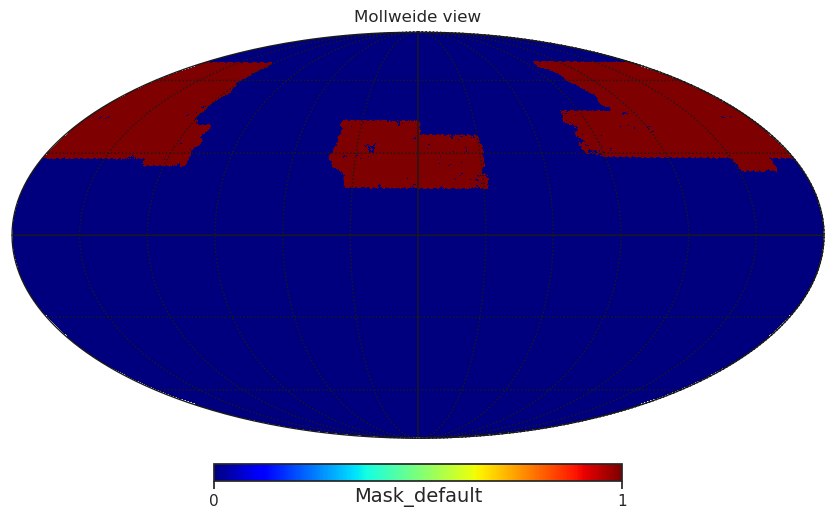

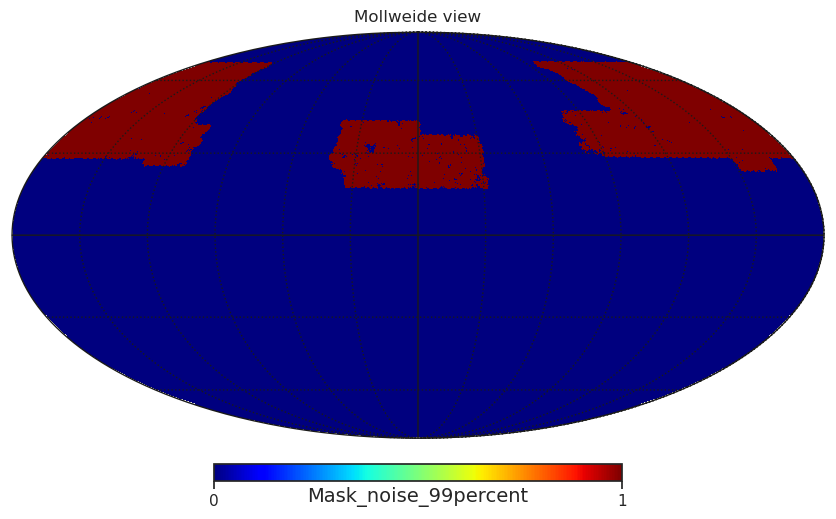

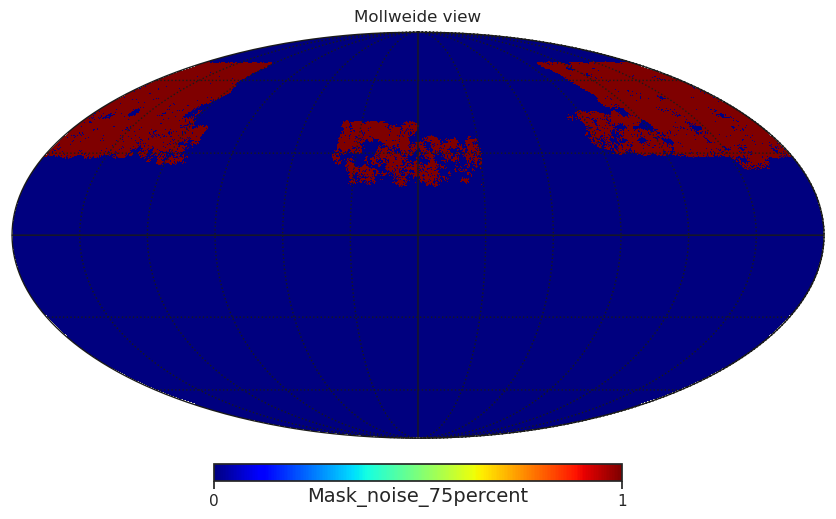

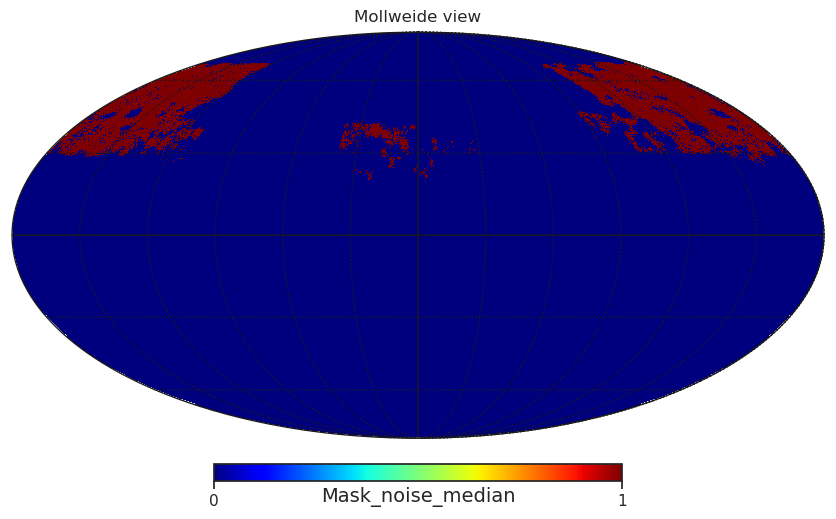

In [6]:
for mask_name, experiment in experiments.items():
    my_mollview(experiment.masks['g'], unit=mask_name)

In [7]:
for experiment_name, experiment in experiments.items():
    print(experiment_name, round(experiment.sigmas['gk'], 2)

Mask_coverage 19.506336043526243
Mask_default 19.849643379370633
Mask_noise_99percent 19.80459346188771
Mask_noise_75percent 17.42744939645988
Mask_noise_median 15.236569806634177


In [6]:
for experiment_name, experiment in experiments.items():
    print(experiment_name, round(experiment.chi_squared['gk'], 2))

Mask_coverage 22.36464306529048
Mask_default 20.03446020098427
Mask_noise_99percent 19.60702366631927
Mask_noise_75percent 18.78573069128693
Mask_noise_median 22.095663827662975


In [7]:
for experiment_name, experiment in experiments.items():
    print(experiment_name, round(experiment.chi_squared['gg'], 2))

Mask_coverage 7066.640199804333
Mask_default 1396.0770078428884
Mask_noise_99percent 1374.3745841375915
Mask_noise_75percent 1016.7579037595194
Mask_noise_median 494.85897526629725


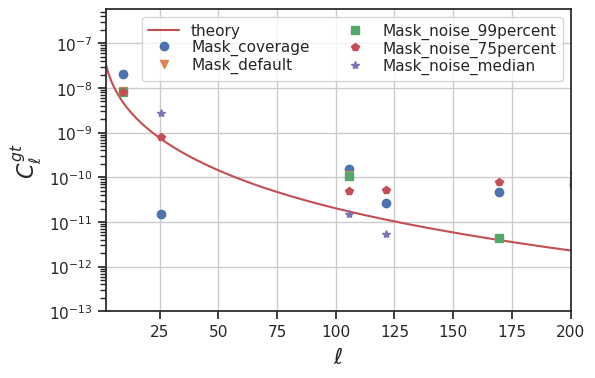

In [16]:
# 16
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=200, y_min=1e-13, y_max=None, x_scale='linear', y_scale='log')

In [ ]:
# 8, 0.5 mJy
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=100, y_min=1e-12, y_max=None, x_scale='linear', y_scale='log')

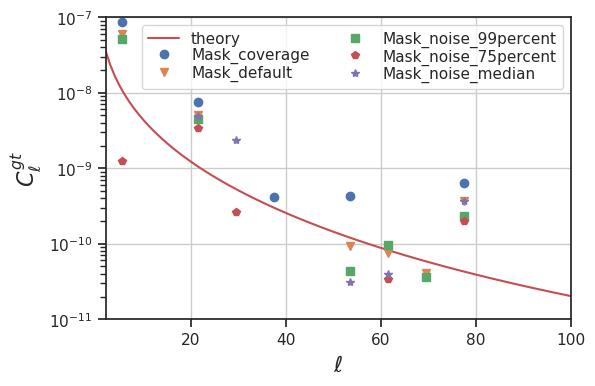

In [7]:
# 8, 1 mJy
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=100, y_min=1e-11, y_max=1e-7, x_scale='linear', y_scale='log')

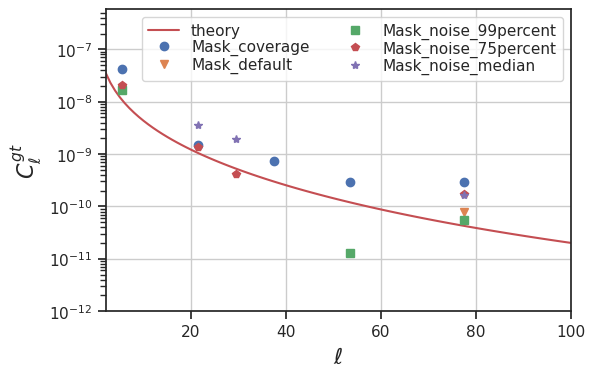

In [9]:
# 8, 2 mJy
plot_many_data_correlations(experiments, 'gt', x_min=2, x_max=100, y_min=1e-12, y_max=None, x_scale='linear', y_scale='log')

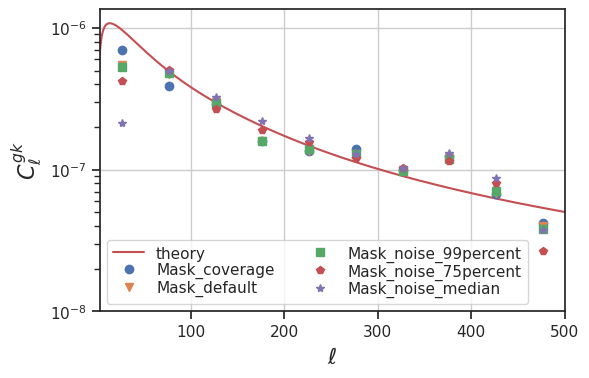

In [8]:
# 50
plot_many_data_correlations(experiments, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log', legend_loc='lower left')

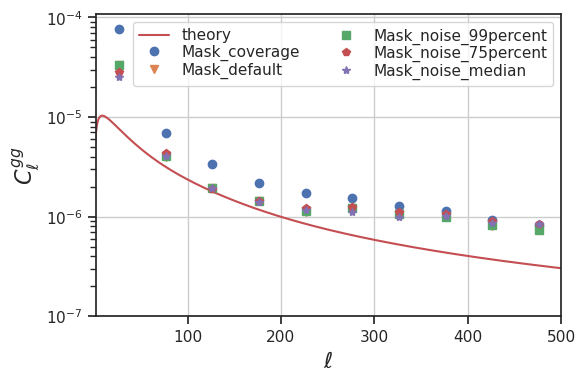

In [7]:
# 50
plot_many_data_correlations(experiments, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

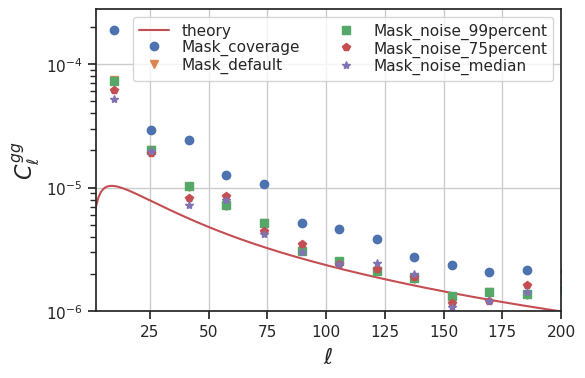

In [13]:
# 16
plot_many_data_correlations(experiments, 'gg', x_min=2, x_max=200, y_min=1e-6, y_max=None, x_scale='linear', y_scale='log')

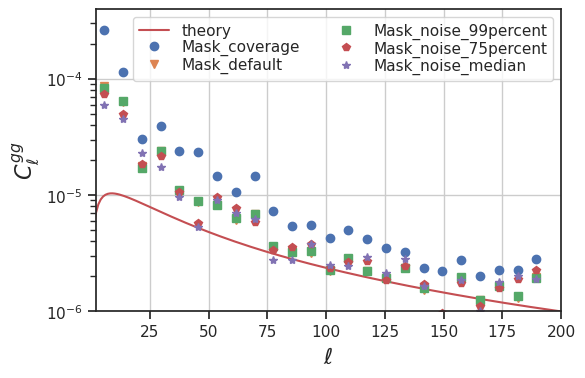

In [7]:
# 8
plot_many_data_correlations(experiments, 'gg', x_min=2, x_max=200, y_min=1e-6, y_max=None, x_scale='linear', y_scale='log')

# Redshift distribution

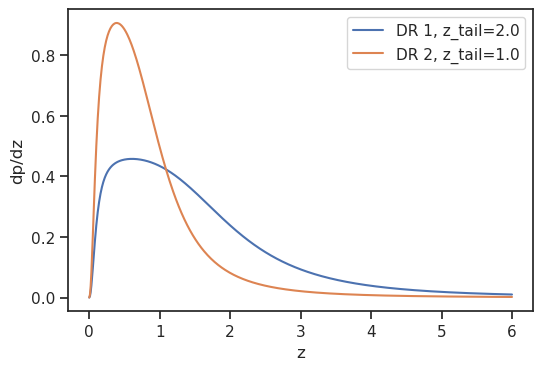

In [12]:
from data_lotss import get_lotss_redshift_distribution
from scipy.integrate import simps

to_plot = [('DR 1', 2.0), ('DR 2', 1.0)]
for z_dist_name, z_tail in to_plot:
    z_arr, n_arr = get_lotss_redshift_distribution(z_tail=z_tail, z_max=6)
    area = simps(n_arr, dx=z_arr[1] - z_arr[0])
    plt.plot(z_arr, n_arr / area, label='{}, z_tail={}'.format(z_dist_name, z_tail))

plt.xlabel('z')
plt.ylabel('dp/dz')
plt.legend()
plt.show()

# Data

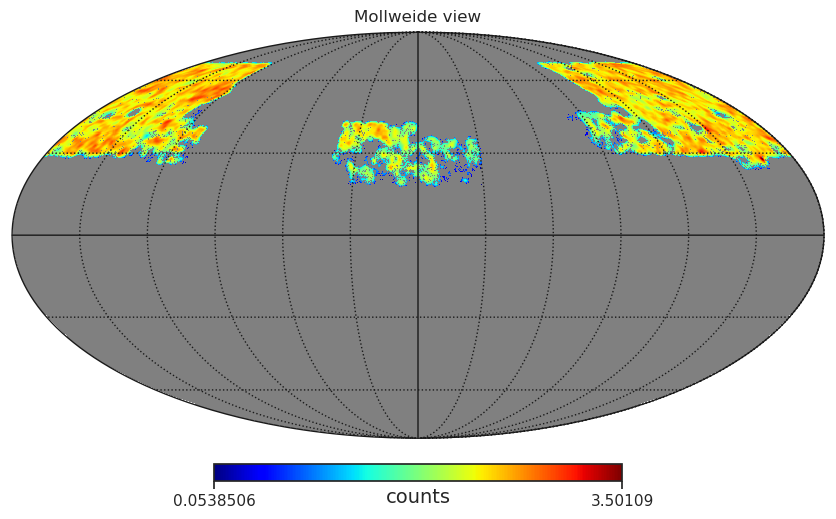

In [40]:
my_mollview(experiment.original_maps['g'], unit='counts', fwhm=1.4)

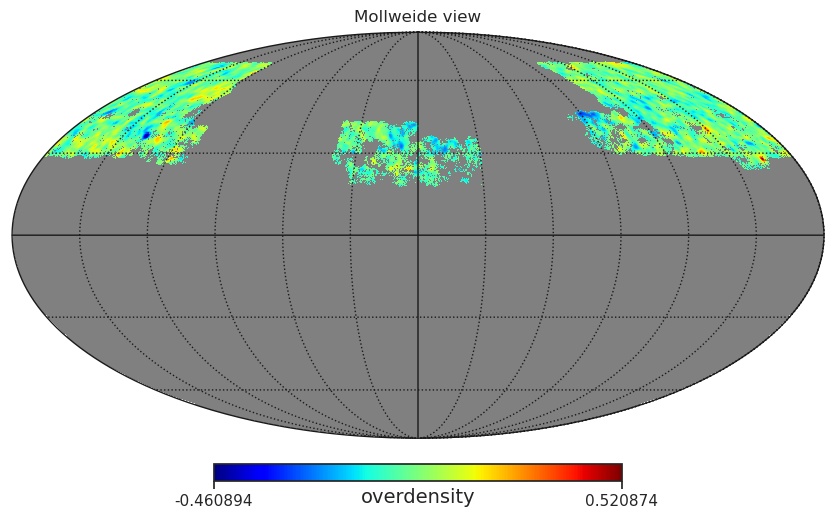

In [39]:
# No noise weight
my_mollview(experiment.processed_maps['g'], unit='overdensity', fwhm=1.4)

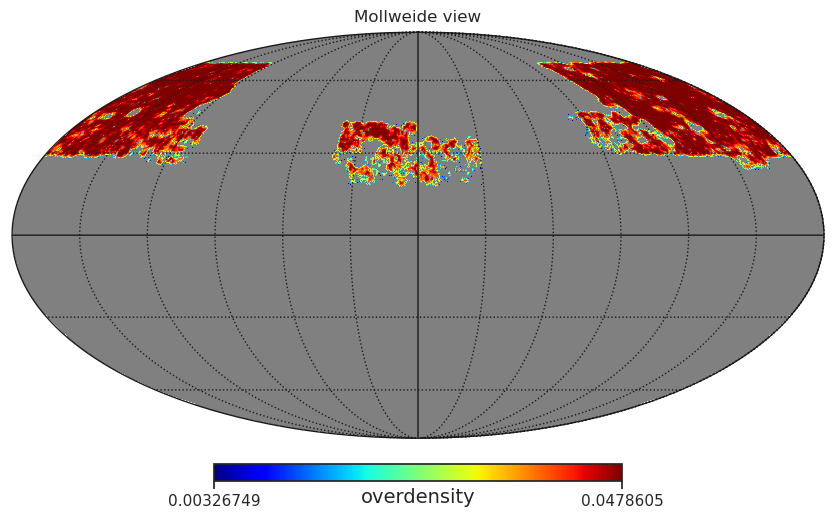

In [37]:
my_mollview(experiment.noise_weight_maps['g'], unit='overdensity', fwhm=0.8)

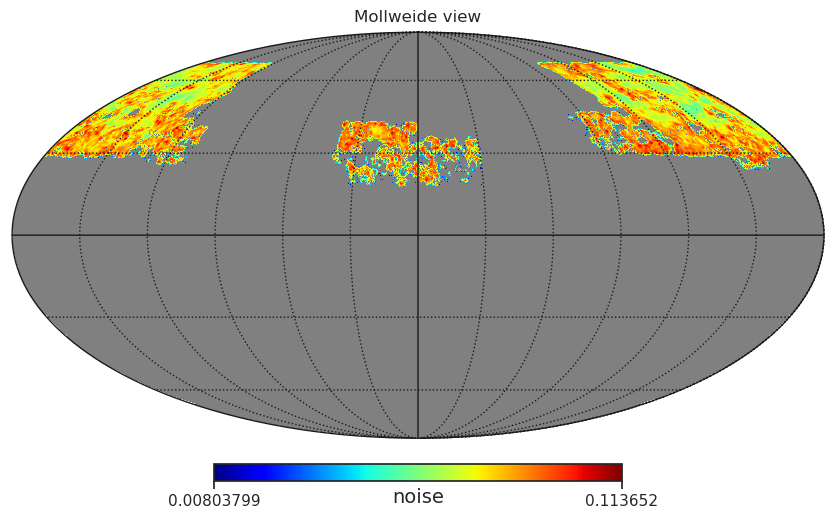

In [36]:
my_mollview(experiment.noise_maps['g'], unit='noise', fwhm=0.8)

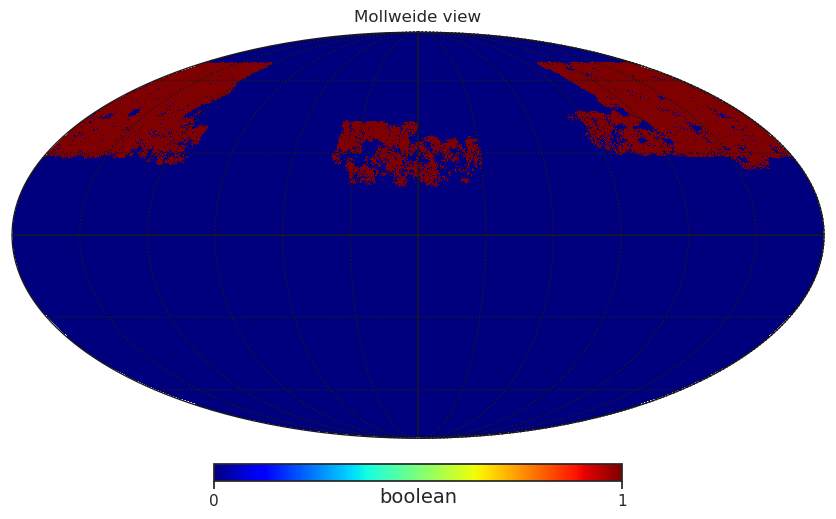

In [34]:
my_mollview(experiment.masks['g'], unit='boolean')

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 30.575585 arcmin (0.008894 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 72.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


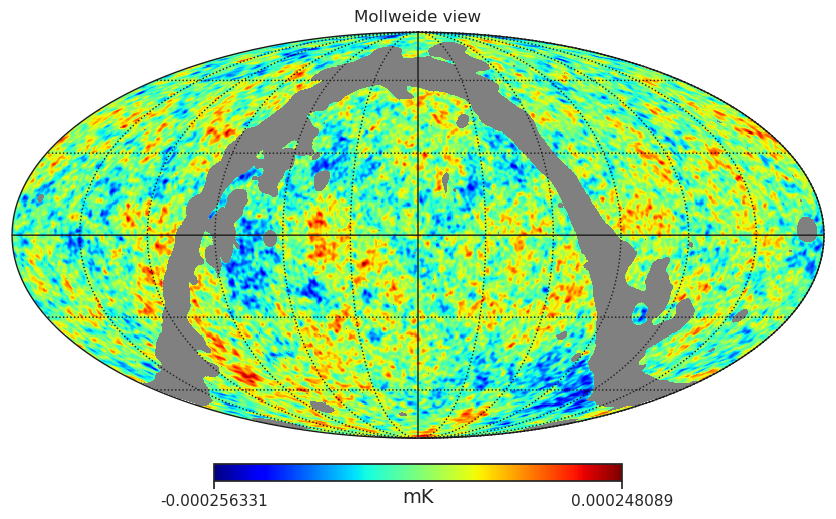

In [10]:
my_mollview(experiment.processed_maps['t'], unit='mK', fwhm=1.2)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 15.287792 arcmin (0.004447 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 36.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


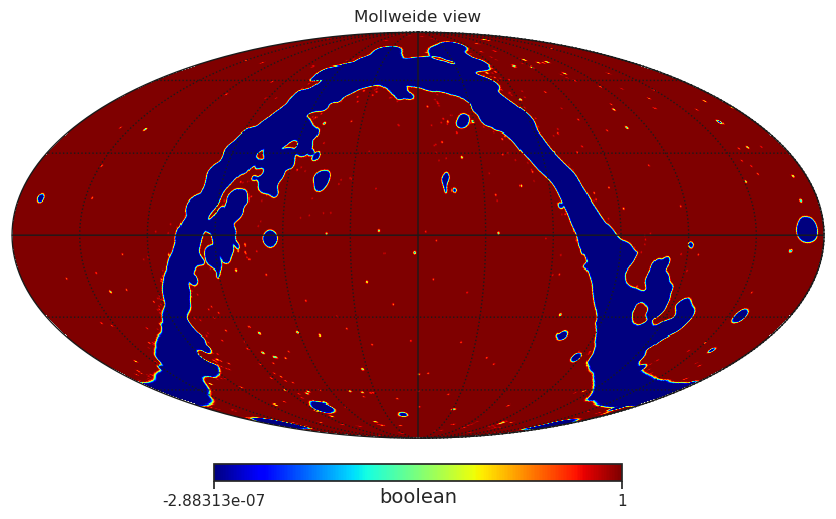

In [11]:
my_mollview(experiment.masks['t'], unit='boolean', fwhm=0.6)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 40.767446 arcmin (0.011859 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 96.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


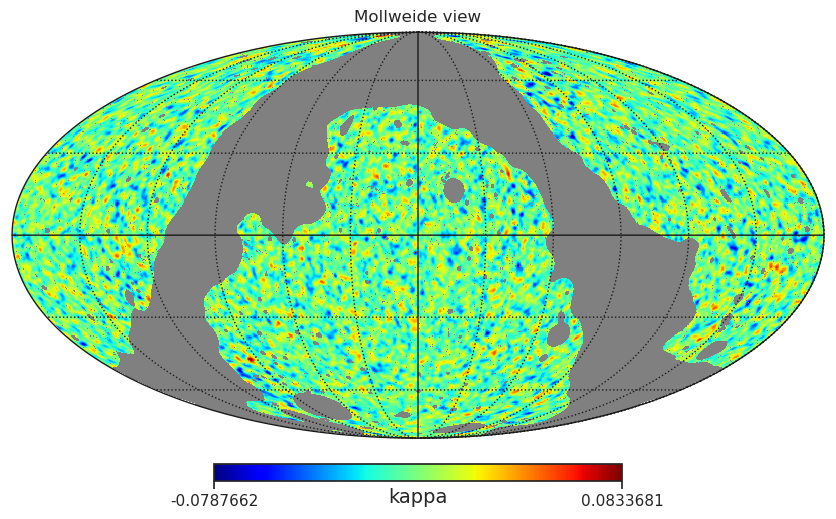

In [12]:
my_mollview(experiment.processed_maps['k'], unit='kappa', fwhm=1.6)

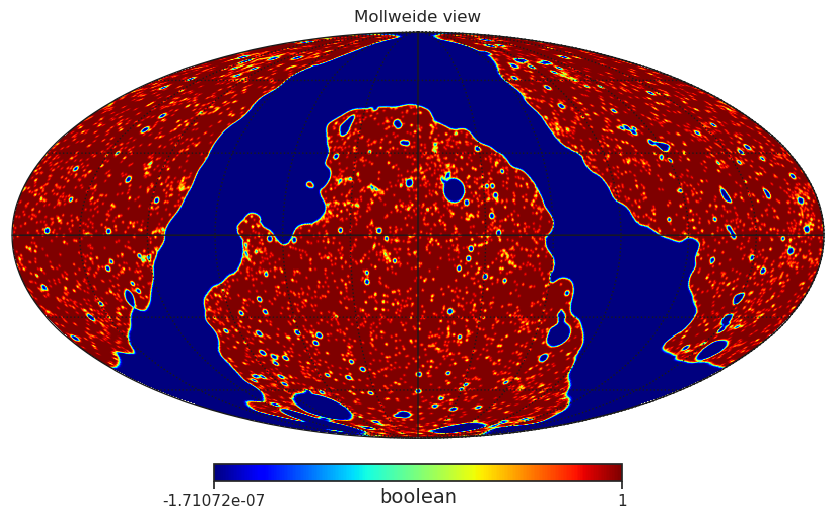

In [13]:
my_mollview(experiment.masks['k'], unit='boolean', fwhm=0.8)